In [1]:
import gzip
import h5py
import pickle
import os
import numpy as np

try:
    from tqdm import trange
except ImportError:
    trange = range
    
from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['image.interpolation'] = None
plt.rcParams['image.cmap'] = 'gray'

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [18]:
with gzip.open('data/mnist.pkl.gz','rb') as ff :     
    u = pickle._Unpickler( ff )
    u.encoding = 'latin1'
    train_set, val_set, test_set = u.load()


In [52]:
print(train_set[0].shape)
print(val_set[0].shape)
print(test_set[0].shape)

(50000, 784)
(10000, 784)
(10000, 784)


(125, 2)
(50, 2)


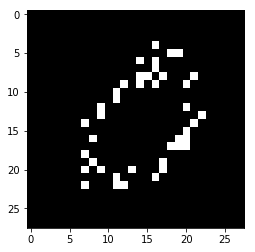

In [58]:
sampleImg = train_set[0][1].reshape(28,28)
sampleImg[sampleImg < 0.5] = 0
plt.imshow(sampleImg)

non_zero_coord = np.transpose(np.nonzero(sampleImg))
print(non_zero_coord.shape)

s_indices = np.random.choice(len(non_zero_coord), 50)
s_non_zero_coord = non_zero_coord[s_indices]

ds_img = np.zeros((28,28))
ds_img[s_non_zero_coord[:,0],s_non_zero_coord[:,1]] = 1.0

print(s_non_zero_coord.shape)

plt.imshow(ds_img)